In [9]:
import pandas as pd
import sqlite3


In [10]:
#creating database connection
conn = sqlite3.connect('Ecommerce.db')

In [11]:
# Checking tables present in the database
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", conn)

print(tables)

             name
0  EcommerceSales


In [12]:
# ==========================================
# 1. Import Libraries
# ==========================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

# Display plots inline
%matplotlib inline

# ==========================================
# 2. Load Data from Database
# ==========================================
engine = create_engine("sqlite:///Ecommerce.db")

# Load EcommerceSales table
df = pd.read_sql("SELECT * FROM EcommerceSales", con=engine)

# Preview
df.head()


,OrderID,Product,Category,Region,CustomerType,Month,UnitPrice,Quantity,Revenue,Sales,CustomerID,OrderDate
0,1,Jeans,Clothing,West,Repeat,2023-06-30,388,8,3104,7370,C00001,2023-10-18 00:00:00.000000
1,2,Mixer,Home & Kitchen,West,Repeat,2024-04-30,414,1,414,960,C00002,2022-09-26 00:00:00.000000
2,3,Chair,Home & Kitchen,South,New,2024-10-31,194,7,1358,5490,C00003,2022-01-17 00:00:00.000000
3,4,Textbook,Books,South,New,2024-01-31,181,4,724,5291,C00004,2023-02-03 00:00:00.000000
4,5,Lipstick,Beauty,North,New,2023-06-30,301,3,903,5834,C00005,2022-03-22 00:00:00.000000


In [13]:
# ==========================================
# 3. Basic Info & Missing Values
# ==========================================
print("Shape:", df.shape)
print("\nDataset Info:")
print(df.info())

print("\nMissing Values per Column:")
print(df.isnull().sum())

print("\nDuplicate Rows:", df.duplicated().sum())


Shape: (100000, 9)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   OrderID       100000 non-null  int64 
 1   Product       100000 non-null  object
 2   Category      100000 non-null  object
 3   Region        100000 non-null  object
 4   CustomerType  100000 non-null  object
 5   Month         100000 non-null  object
 6   UnitPrice     100000 non-null  int64 
 7   Quantity      100000 non-null  int64 
 8   Revenue       100000 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 6.9+ MB
None

Missing Values per Column:
OrderID         0
Product         0
Category        0
Region          0
CustomerType    0
Month           0
UnitPrice       0
Quantity        0
Revenue         0
dtype: int64

Duplicate Rows: 0


In [6]:
# ==========================================
# 4. Descriptive Statistics
# ==========================================
df.describe(include="all").T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
OrderID,100000.0,NaN,NaN,NaN,50000.5,28867.657797,1.0,25000.75,50000.5,75000.25,100000.0
Product,100000,20,Perfume,5119,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,100000,5,Beauty,20288,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,100000,4,East,25059,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CustomerType,100000,2,New,50021,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,100000,24,2024-04-30,4317,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UnitPrice,100000.0,NaN,NaN,NaN,274.8403,130.025916,50.0,162.0,275.0,387.0,499.0
Quantity,100000.0,NaN,NaN,NaN,5.00109,2.583977,1.0,3.0,5.0,7.0,9.0
Revenue,100000.0,NaN,NaN,NaN,1374.44168,1019.553979,50.0,525.0,1106.0,2004.0,4491.0
Sales,100000.0,NaN,NaN,NaN,5051.37257,2859.646419,100.0,2574.0,5055.0,7528.0,9999.0


In [7]:

import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from datetime import datetime, timedelta
import random

# Connect to SQLite database
engine = create_engine("sqlite:///Ecommerce.db")

# Load existing table into DataFrame
df = pd.read_sql("SELECT * FROM EcommerceSales", con=engine)
print("Before:", df.shape)
print(df.head())

# -----------------------------
# 1. Add 'Sales' column (random values)
# -----------------------------
np.random.seed(42)
df["Sales"] = np.random.randint(100, 10000, size=len(df))

# -----------------------------
# 2. Add 'CustomerID' column (random alphanumeric IDs)
# Example: C00001, C00002, ...
# -----------------------------
num_rows = len(df)
df["CustomerID"] = ["C" + str(i+1).zfill(5) for i in range(num_rows)]

# -----------------------------
# 3. Add 'OrderDate' column (random dates in last 2 years)
# -----------------------------
start_date = datetime(2022, 1, 1)
end_date = datetime(2024, 12, 31)

def random_date(start, end):
    delta = end - start
    random_days = random.randint(0, delta.days)
    return start + timedelta(days=random_days)

df["OrderDate"] = [random_date(start_date, end_date) for _ in range(num_rows)]

# -----------------------------
# 4. Save updated DataFrame back to database
# -----------------------------
df.to_sql("EcommerceSales", con=engine, if_exists="replace", index=False)

# -----------------------------
# 5. Verify
# -----------------------------
df_check = pd.read_sql("SELECT * FROM EcommerceSales LIMIT 5", con=engine)
print(df_check)


Before: (100000, 12)
   OrderID   Product        Category Region CustomerType       Month  \
0        1     Jeans        Clothing   West       Repeat  2023-06-30   
1        2     Mixer  Home & Kitchen   West       Repeat  2024-04-30   
2        3     Chair  Home & Kitchen  South          New  2024-10-31   
3        4  Textbook           Books  South          New  2024-01-31   
4        5  Lipstick          Beauty  North          New  2023-06-30   

   UnitPrice  Quantity  Revenue  Sales CustomerID                   OrderDate  
0        388         8     3104   7370     C00001  2023-10-28 00:00:00.000000  
1        414         1      414    960     C00002  2024-10-13 00:00:00.000000  
2        194         7     1358   5490     C00003  2022-01-07 00:00:00.000000  
3        181         4      724   5291     C00004  2023-12-21 00:00:00.000000  
4        301         3      903   5834     C00005  2023-06-21 00:00:00.000000  
   OrderID   Product        Category Region CustomerType       Mon

In [3]:
print(df.columns)


Index(['OrderID', 'Product', 'Category', 'Region', 'CustomerType', 'Month',
       'UnitPrice', 'Quantity', 'Revenue', 'Sales', 'CustomerID', 'OrderDate'],
      dtype='object')


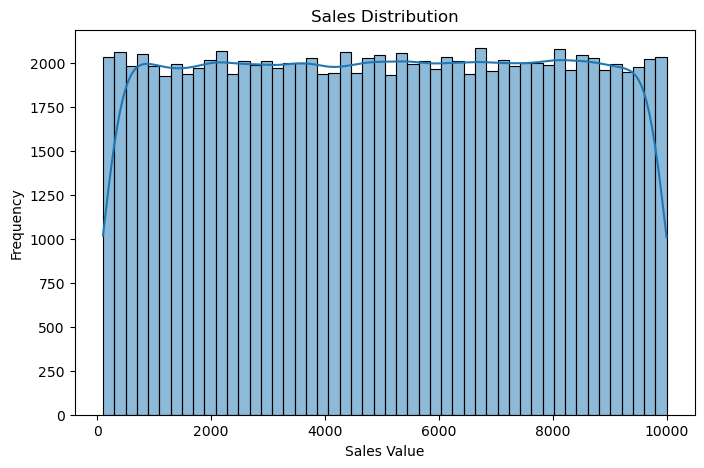

In [8]:
# ==========================================
# 5. Sales Distribution (Histogram)
# ==========================================
plt.figure(figsize=(8,5))
sns.histplot(df['Sales'], bins=50, kde=True)
plt.title("Sales Distribution")
plt.xlabel("Sales Value")
plt.ylabel("Frequency")
plt.show()

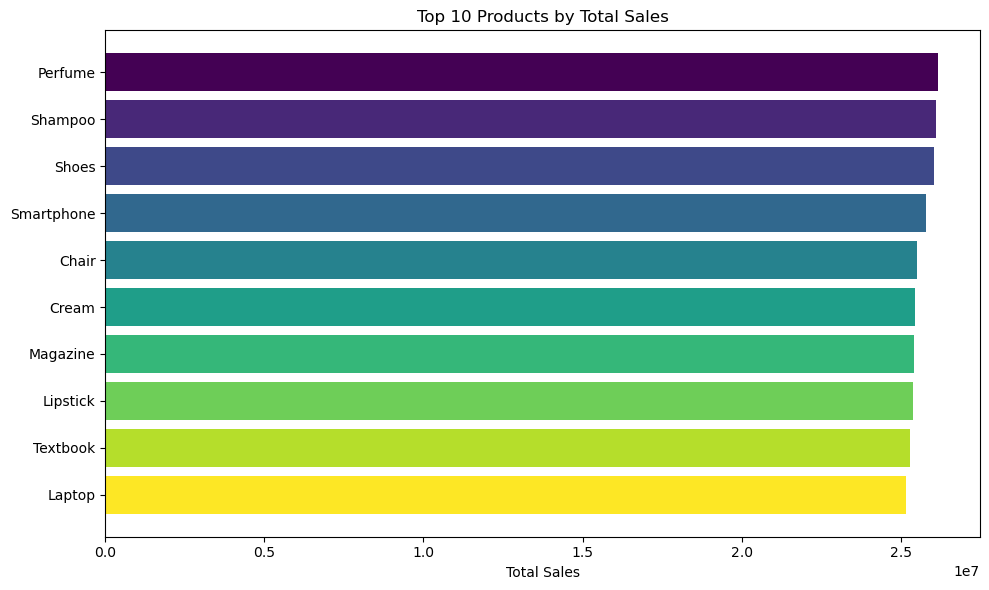

In [9]:
# ==========================================
# 6.top selling products
# ==========================================
import numpy as np
import matplotlib.pyplot as plt

# recompute top_products to be safe
top_products = df.groupby("Product")["Sales"].sum().sort_values(ascending=False).head(10)
df_top = top_products.reset_index(name="Sales")

fig, ax = plt.subplots(figsize=(10,6))
colors = plt.cm.viridis(np.linspace(0, 1, len(df_top)))   # viridis colormap
ax.barh(df_top['Product'], df_top['Sales'], color=colors)
ax.invert_yaxis()  # highest value on top
ax.set_xlabel("Total Sales")
ax.set_title("Top 10 Products by Total Sales")
plt.tight_layout()
plt.show()



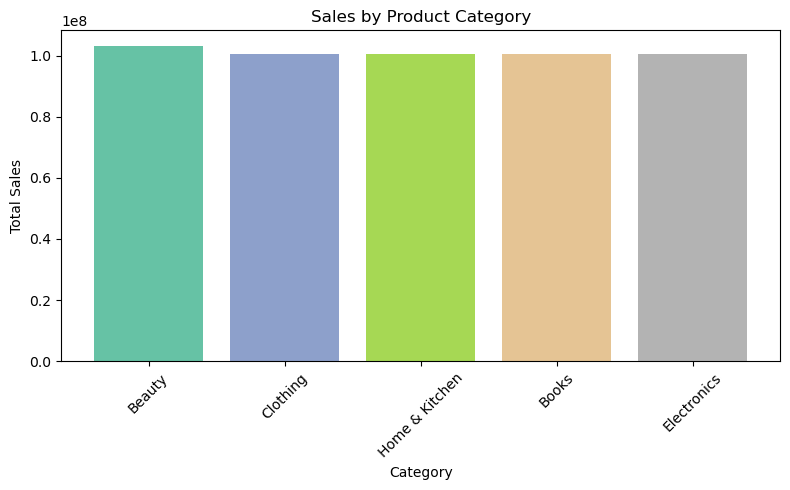

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Compute top categories
category_sales = df.groupby("Category")["Sales"].sum().sort_values(ascending=False)
df_cat = category_sales.reset_index()

# Horizontal bar chart with Set2-like colors
colors = plt.cm.Set2(np.linspace(0, 1, len(df_cat)))

plt.figure(figsize=(8,5))
plt.bar(df_cat["Category"], df_cat["Sales"], color=colors)
plt.title("Sales by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



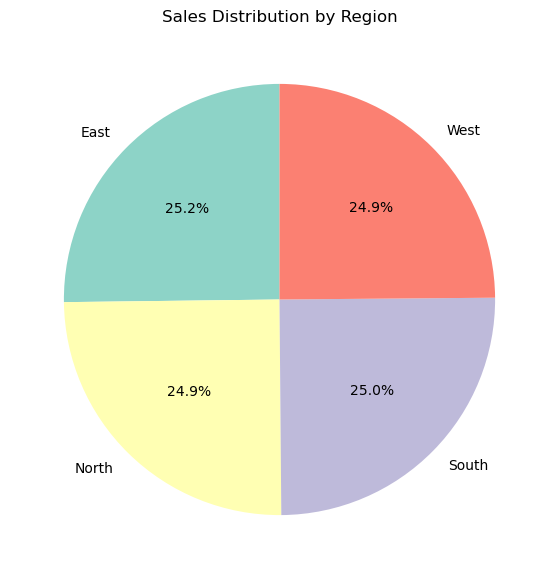

In [11]:

import matplotlib.pyplot as plt

# Aggregate sales by region
region_sales = df.groupby("Region")["Sales"].sum().reset_index()

# Pie chart
plt.figure(figsize=(7,7))
plt.pie(
    region_sales["Sales"],
    labels=region_sales["Region"],
    autopct="%1.1f%%",
    startangle=90,
    colors=plt.cm.Set3.colors  # nice color palette
)
plt.title("Sales Distribution by Region")
plt.show()




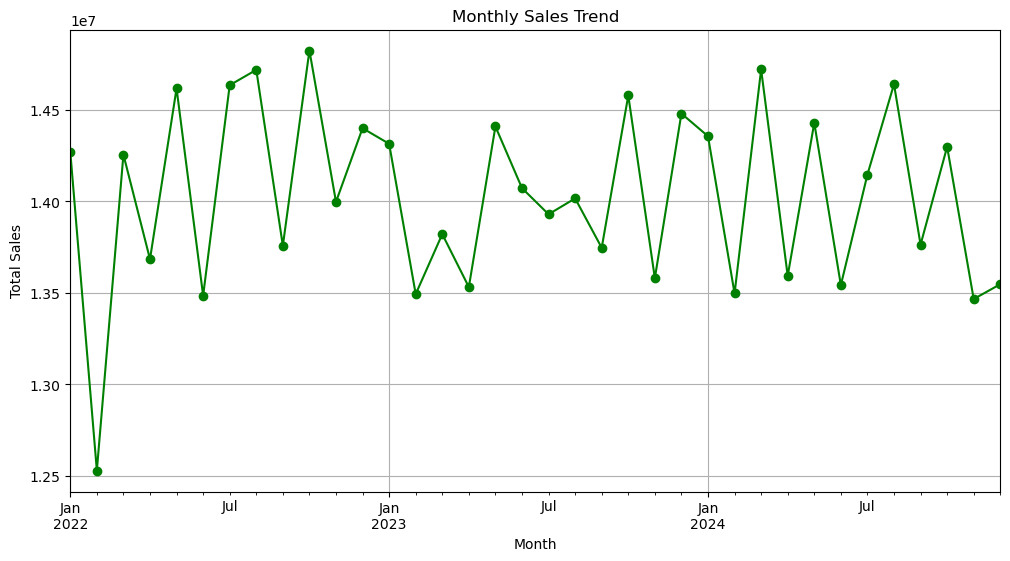

In [12]:
# ==========================================
# 9. Monthly Sales Trend
# ==========================================
# Ensure 'OrderDate' column is in datetime format
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

df['Month'] = df['OrderDate'].dt.to_period("M")

monthly_sales = df.groupby("Month")["Sales"].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot(kind="line", marker="o", color="green")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()


New Customers: 13484, Repeat Customers: 29757


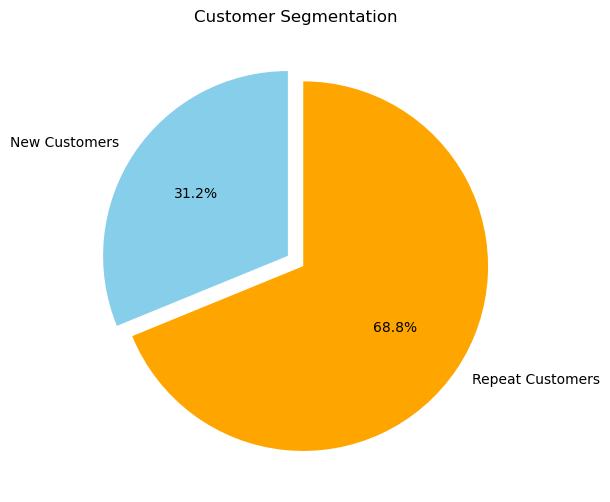

In [13]:
#show new customers and repeat customer 
import numpy as np

num_rows = len(df)  # 100,000 orders
num_unique_customers = 50000  # some customers will repeat

# Generate customer IDs
unique_ids = ["C" + str(i+1).zfill(5) for i in range(num_unique_customers)]

# Randomly assign CustomerID to orders, allowing repeats
np.random.seed(42)
df["CustomerID"] = np.random.choice(unique_ids, size=num_rows)

# Now calculate new vs repeat customers
customer_orders = df.groupby("CustomerID")["OrderID"].nunique()
repeat_customers = (customer_orders > 1).sum()
new_customers = (customer_orders == 1).sum()

print(f"New Customers: {new_customers}, Repeat Customers: {repeat_customers}")

# Pie chart
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.pie(
    [new_customers, repeat_customers],
    labels=["New Customers", "Repeat Customers"],
    autopct="%1.1f%%",
    startangle=90,
    colors=["skyblue", "orange"],
    explode=[0.05,0.05]
)
plt.title("Customer Segmentation")
plt.show()


In [14]:
#Average Order Value per Month
aov = df.groupby('Month')['Sales'].mean()
aov.plot(kind='bar', figsize=(10,5), title='Average Order Value per Month')


<Axes: title={'center': 'Average Order Value per Month'}, xlabel='Month'>

In [17]:
# Total sales
total_sales = df['Sales'].sum()
print("Total Sales:", total_sales)



Total Sales: 505137257


In [2]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np

# Connect to database
engine = create_engine("sqlite:///Ecommerce.db")

# Optional: Check all tables
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", con=engine)
print("Tables in database:", tables)



Tables in database:              name
0  EcommerceSales


In [3]:
# Load EcommerceSales table into df
df = pd.read_sql("SELECT * FROM EcommerceSales", con=engine)

# Preview
df.head()


,OrderID,Product,Category,Region,CustomerType,Month,UnitPrice,Quantity,Revenue,Sales,CustomerID,OrderDate
0,1,Jeans,Clothing,West,Repeat,2023-06-30,388,8,3104,7370,C00001,2023-10-18 00:00:00.000000
1,2,Mixer,Home & Kitchen,West,Repeat,2024-04-30,414,1,414,960,C00002,2022-09-26 00:00:00.000000
2,3,Chair,Home & Kitchen,South,New,2024-10-31,194,7,1358,5490,C00003,2022-01-17 00:00:00.000000
3,4,Textbook,Books,South,New,2024-01-31,181,4,724,5291,C00004,2023-02-03 00:00:00.000000
4,5,Lipstick,Beauty,North,New,2023-06-30,301,3,903,5834,C00005,2022-03-22 00:00:00.000000


In [4]:
df.to_csv("ecommerce_processed.csv", index=False)
print("DataFrame saved to ecommerce_processed.csv successfully!")


DataFrame saved to ecommerce_processed.csv successfully!


In [5]:
import os

# Show current working directory
print(os.getcwd())


C:\Users\Dell\project


In [6]:
df.to_csv(r"C:\Users\Dell\Documents\ecommerce_processed.csv", index=False)
